**1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.**

In [1]:
import pandas as pd
#import the decision tree classifier
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
import matplotlib.pyplot as plt
#import this model to import decision tree
from IPython.display import Image

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [73]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
# decision tree classifier
#deep and complex trees tend to overfit, so we want to generalize and have
#reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 8, min_samples_split= 25, random_state=24)

In [74]:
#fit the model with the training data
model = model.fit(X_train, y_train)
#predict the results with the test data
y_pred = model.predict(X_test)

In [75]:
#classification report will lwt us know what happened
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       150
           1       0.76      0.69      0.72        81

    accuracy                           0.81       231
   macro avg       0.80      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



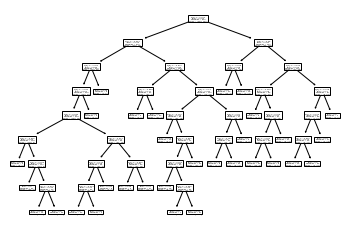

In [79]:
tree.plot_tree(model)
plt.savefig("tree.svg")
plt.show()

**Changing the min_samples_split to 25 improved precision and recall**

**2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)**


Example input:
[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ] Example output:
Nichole, Tanisha & Maggie

In [25]:
names = ([{'name': 'Nicole'}, {'name': 'Lisa'}, {'name': 'Tanisha'}, {'name': 'Jamal'}])

def namelist(names):
    #f there is only one name in the list then return that name as a string
    if len(names) == 1:
        #loop through the list of names, and then split that dictionary by adding .items() at the end, only return the value
        for n in names:
            for key, value in n.items():
                   return value
    #if list has more than 1 name, follow the same process: loop through each element in the “names” list 
    #add add the names to the list_names list
    else:
        list_names = []
        for n in names:
            for key, value in n.items():
                list_names.append(value)
    #use .join() function to string together all the names except the last name, add the ampersand and the last name to finish off the string
        return ', '.join(list_names[:-1]) + ' & ' + list_names[-1]

In [26]:
namelist(names)

'Nicole, Lisa, Tanisha & Jamal'

In [28]:
#this will not work

def namelist(name):
    list_names = []
    for n in names:
        for key, value in n.items():
            list_names.append(value)
    #use .join() function to string together all the names except the last name, add the ampersand and the last name to finish off the string
        return ', '.join(list_names[:-1]) + ' & ' + list_names[-1]


In [29]:
namelist(names)

' & Nicole'